In [3]:
import igraph
import numpy as np
import pandas as pd
import analysis_toolbox as at
graph = igraph.load('C:\\SHB\\FOK!\\FOK!_users.graphml')
#graph.vs[0].delete()
#graph.save('C:\\SHB\\FOK!\\FOK!_users.graphml')


In [72]:
avg_discussion_initiators, sd_discussion_initiators, high_discussion_initiators = at.get_users_with_high_attribute_value(graph,'n_initiations')

In [73]:
avg_interaction_engagers,sd_interaction_engagers,high_interaction_engagers = at.get_users_with_high_attribute_value(graph,'n_sex_comments')

: 

In [2]:
#import matplotlib.pyplot as plt
in_d = graph.degree_distribution(mode='in')
out_d = graph.degree_distribution(mode='out')
#plt.hist(graph.degree(), 20)
#plt.show()

In [4]:
#print(graph.degree_distribution(mode='in'))
print(graph.degree_distribution(mode='out'))
#print(graph.degree_distribution(mode='all'))

N = 5181, mean +- sd: 13.4773 +- 59.6733
Each * represents 36 items
[   0,    1): ********************************************************* (2061)
[   1,    2): *********************** (838)
[   2,    3): *********** (408)
[   3,    4): ****** (220)
[   4,    5): **** (178)
[   5,    6): **** (154)
[   6,    7): *** (108)
[   7,    8): ** (90)
[   8,    9): ** (83)
[   9,   10): * (70)
[  10,   11): * (67)
[  11,   12): * (41)
[  12,   13): * (39)
[  13,   14):  (35)
[  14,   15): * (41)
[  15,   16):  (35)
[  16,   17):  (33)
[  17,   18):  (30)
[  18,   19):  (25)
[  19,   20):  (26)
[  20,   21):  (22)
[  21,   22):  (19)
[  22,   23):  (17)
[  23,   24):  (15)
[  24,   25):  (15)
[  25,   26):  (21)
[  26,   27):  (9)
[  27,   28):  (11)
[  28,   29):  (14)
[  29,   30):  (18)
[  30,   31):  (14)
[  31,   32):  (9)
[  32,   33):  (8)
[  33,   34):  (12)
[  34,   35):  (12)
[  35,   36):  (14)
[  36,   37):  (9)
[  37,   38):  (5)
[  38,   39):  (6)
[  39,   40):  (4)
[  40,   41): 

In [6]:
high_in_degree = {v for v in graph.vs if v.indegree() > in_d.mean + in_d.sd}
len(high_in_degree)

233

In [66]:
n_sex_comments_mean = np.mean([v.attributes()['n_sex_comments'] for v in graph.vs])
n_sex_comments_sd = np.std([v.attributes()['n_sex_comments'] for v in graph.vs])

In [68]:
high_in_degree_normalized = {v for v in graph.vs if v.attributes()['n_sex_comments'] != 0 and v.indegree()/v.attributes()['n_sex_comments'] > in_d.mean/n_sex_comments_mean + in_d.sd/n_sex_comments_sd}
len(high_in_degree_normalized)

309

In [26]:
high_out_degree = {v for v in graph.vs if v.outdegree() > out_d.mean + out_d.sd}
len(high_out_degree)

204

In [70]:
high_out_degree_normalized = {v for v in graph.vs if v.attributes()['n_sex_comments'] != 0 and v.outdegree()/v.attributes()['n_sex_comments'] > out_d.mean/n_sex_comments_mean + out_d.sd/n_sex_comments_sd}
len(high_out_degree_normalized)

5

In [28]:
key_actors = high_in_degree.intersection(high_out_degree)
len(key_actors)

183

In [33]:
max([v.outdegree() for v in high_out_degree])

73

In [15]:
def get_high_centrality(centrality_method):
    if centrality_method == 'betweenness':
        avg = np.mean(graph.betweenness())
        sd = np.std(graph.betweenness())
    if centrality_method == 'closeness':
        closeness = [c for c in graph.closeness() if not pd.isna(c)]
        avg = np.mean(closeness)
        sd = np.std(closeness)
    res = set()
    for v in graph.vs:
        print('Processing vertex ',v.index)
        if (centrality_method == 'betweenness' and v.betweenness() > avg + sd) or (centrality_method == 'closeness' and v.closeness() > avg + sd):
            res.add(v)
    return res

In [2]:
high_betweeness = get_high_centrality('betweenness')

NameError: name 'get_high_centrality' is not defined

In [17]:
len(high_betweeness)

108

In [52]:
min(high_betweeness_dict.values())/((len(graph.vs)-1)*(len(graph.vs)-2))

0.0014893235554937967

In [56]:
key_actors_b = key_actors.intersection(high_betweeness)
print(len(key_actors_b))

100


In [53]:
key_actors_b_diff = key_actors.difference(high_betweeness)
for b_d in key_actors_b:
    print(str(b_d.indegree()) + ' - ' + str(b_d.outdegree()) + ' - ' + str(b_d.betweenness()))

158 - 124 - 39954.41067441429
86 - 87 - 58872.13357749039
485 - 394 - 60096.529288337624
335 - 273 - 99897.04784417739
200 - 496 - 262886.83048514614
169 - 255 - 73195.32237566226
148 - 138 - 100181.86808467889
101 - 167 - 52648.3324648258
686 - 607 - 524627.9242891973
343 - 557 - 281104.05580126867
589 - 786 - 76027.27308294392
553 - 909 - 875874.1307632804
248 - 231 - 126809.04655963108
127 - 173 - 99709.1950367037
202 - 260 - 93378.33057710217
99 - 117 - 86695.53480070017
496 - 589 - 333662.18861369765
230 - 185 - 137928.78901796674
173 - 207 - 66452.94670599622
305 - 544 - 159685.13211214688
214 - 319 - 110068.67452255025
197 - 178 - 106252.36972662357
85 - 103 - 65084.941933379734
192 - 168 - 98900.67263250895
212 - 76 - 69480.46127155058
139 - 126 - 68161.8413723509
638 - 705 - 45398.65959786648
161 - 187 - 69566.9969665655
70 - 82 - 40995.820784974145
148 - 178 - 51465.3482668025
67 - 94 - 54473.61693062088
357 - 441 - 227557.3742200881
163 - 195 - 102299.33690484757
119 - 97 - 

In [23]:
import json
high_betweeness_dict = {}
for b in list(high_betweeness):
    print('Processing vertex ',b.index)
    high_betweeness_dict[b.attributes()['id']] = b.betweenness()
# create json object from dictionary
json = json.dumps(high_betweeness_dict)

# open file for writing, "w" 
f = open("C:\\SHB\\FOK!\\high_betweeness_dict.json","w")

# write json object to file
f.write(json)

# close file
f.close()

In [38]:
import pandas as pd
high_closeness = get_high_centrality('closeness')

Processing vertex  0
Processing vertex  1
Processing vertex  2
Processing vertex  3
Processing vertex  4
Processing vertex  5
Processing vertex  6
Processing vertex  7
Processing vertex  8
Processing vertex  9
Processing vertex  10
Processing vertex  11
Processing vertex  12
Processing vertex  13
Processing vertex  14
Processing vertex  15
Processing vertex  16
Processing vertex  17
Processing vertex  18
Processing vertex  19
Processing vertex  20
Processing vertex  21
Processing vertex  22
Processing vertex  23
Processing vertex  24
Processing vertex  25
Processing vertex  26
Processing vertex  27
Processing vertex  28
Processing vertex  29
Processing vertex  30
Processing vertex  31
Processing vertex  32
Processing vertex  33
Processing vertex  34
Processing vertex  35
Processing vertex  36
Processing vertex  37
Processing vertex  38
Processing vertex  39
Processing vertex  40
Processing vertex  41
Processing vertex  42
Processing vertex  43
Processing vertex  44
Processing vertex  4

In [65]:
key_actors_c = key_actors.intersection(high_closeness)
print(len(key_actors_c))


75


In [63]:
key_actors_c_diff = key_actors_c.difference(key_actors)
#for b_d in key_actors_b:
#    print(str(b_d.indegree()) + ' - ' + str(b_d.outdegree()) + ' - ' + str(b_d.betweenness()))#

In [45]:
print(sorted([v.closeness() for v in high_closeness],reverse=True))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.75, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.5, 0.5, 0.49523204068658616, 0.48499564188768524, 0.48313073678987845, 0.47194959408699866, 0.4665788212745568, 0.45969550336362563, 0.45791206207383023, 0.45555555555555555, 0.45465156997782186, 0.4503410798936293, 0.44904311736223196, 0.4482163406214039, 0.4477011494252874, 0.4468280371687507, 0.4462648945921173, 0.44585622710622713, 0.44382406563354604, 0.44256334507442335, 0.441559913841968, 0.43926920040599976, 0.43857673685395787, 0.43818202272471596, 0.4370021317177157, 0.43621906148504874, 0.43582857782253553, 0.43316281138790036, 0.4330183435241801, 0.4312444641275465, 0.4298642533936652, 0.42929571255373083, 0.4287286736378646, 0.4275521405049396, 0.4274113903215187,

In [46]:
closeness = [c for c in graph.closeness() if not pd.isna(c)]
print(np.mean(closeness))
print(np.std(closeness))

0.32474694343662575
0.085406283227156


26.954641961011387 108.86723190545622


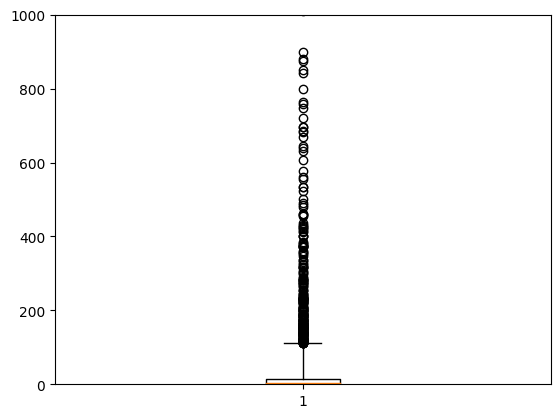

In [26]:
import matplotlib.pyplot as plt
import numpy as np
d = graph.degree()
#c = sorted(graph.coreness())
print(np.mean(d), np.std(d))
#print(np.mean(c), np.std(c))
#c = [core for core in c if core > 150]
#print(len(c))
plt.boxplot(d,whis=[5,95])
#plt.plot(c[-1000:], color='yellow')
#plt.xlim(0, len(c))
plt.ylim(0,1000)
plt.show()

C:\Users\kpale\AppData\Local\Temp\ipykernel_23488\2352774289.py:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  xs, ys = zip(*[(left, count) for left, _, count in list(graph.clusters().size_histogram().bins())])


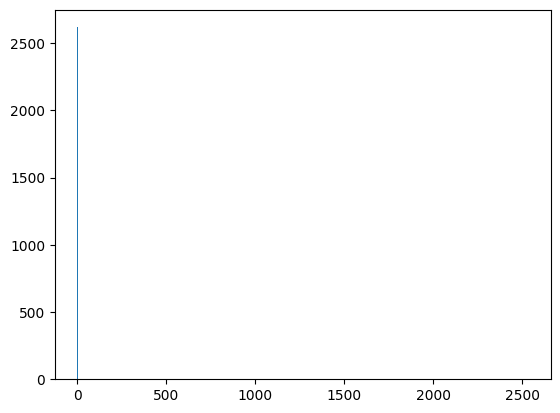

(2619,
 13,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [22]:
xs, ys = zip(*[(left, count) for left, _, count in list(graph.clusters().size_histogram().bins())])
import pylab
pylab.bar(xs,ys)
pylab.show()
ys